In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## References:

[0] [Gregory Michaelson FE Exam Review: Transportation](https://www.youtube.com/watch?v=us26CSISYHE)

# 0. Vertical Curves

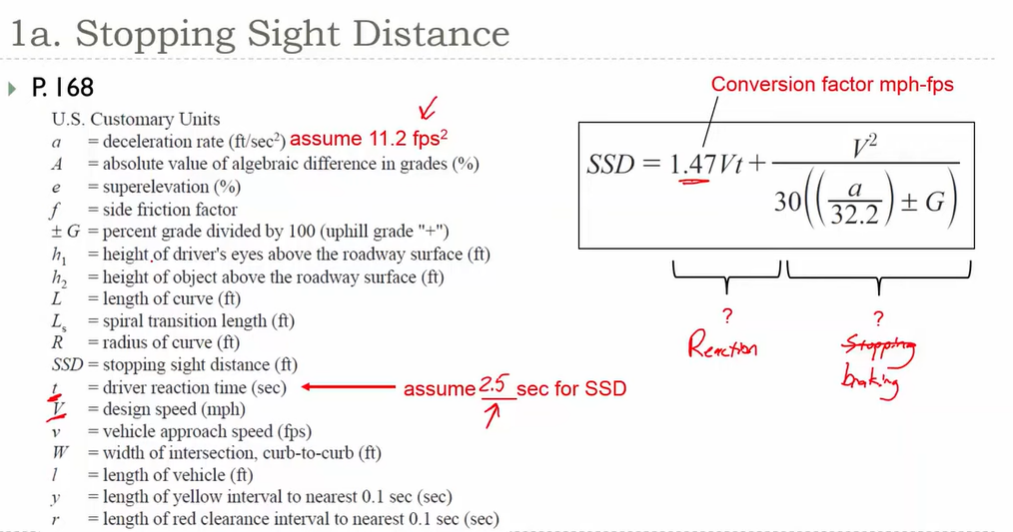
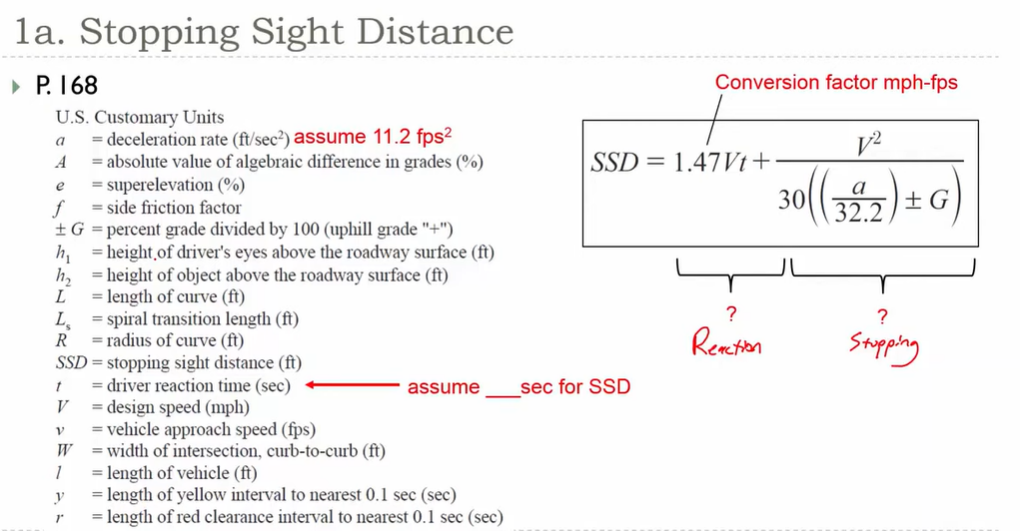
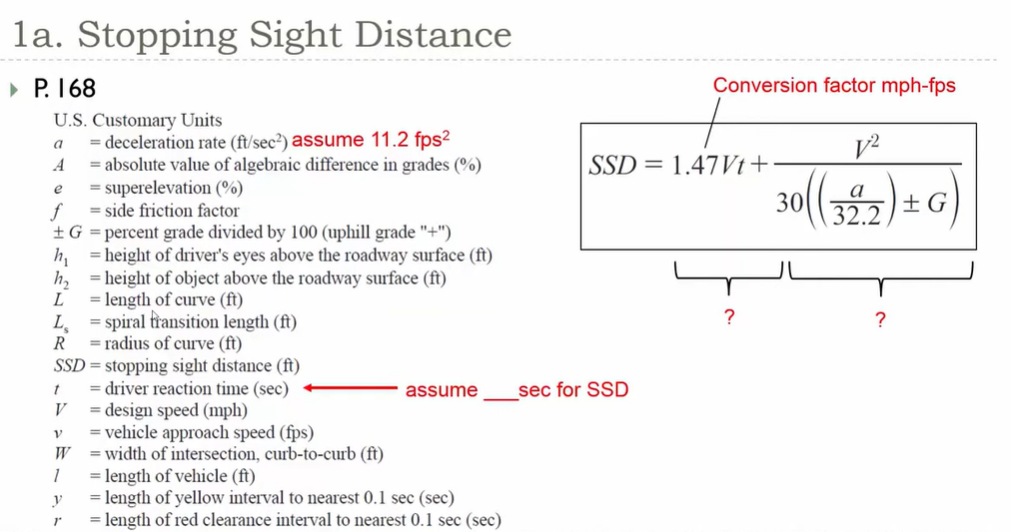

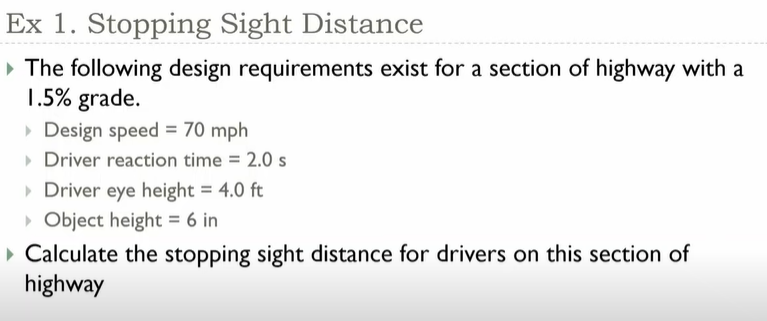

In [23]:
grade = 1.5 #%
grade /= 100 # we are given in ft so grade must be converted into decimals
V = 70 # mph 
t = 2.0 # seconds 
a = 11.2 # ft/sec^2

ssd = 1.47*V*t + (V**2/(30*((a/32.2) - grade))) # always consider the conservative value
print(f'Stopping sight distance: {round(ssd,3)} ft')

Stopping sight distance: 696.547 ft


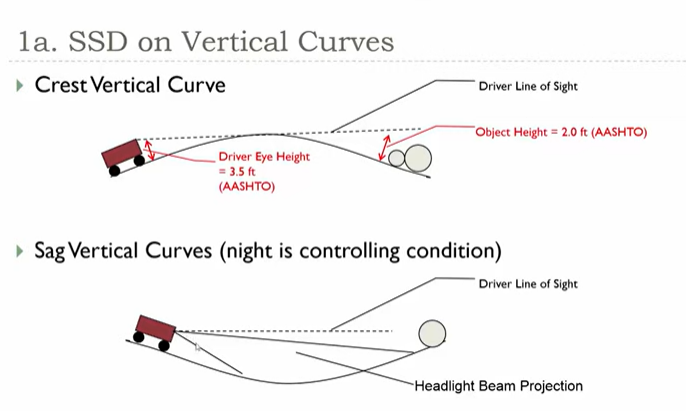

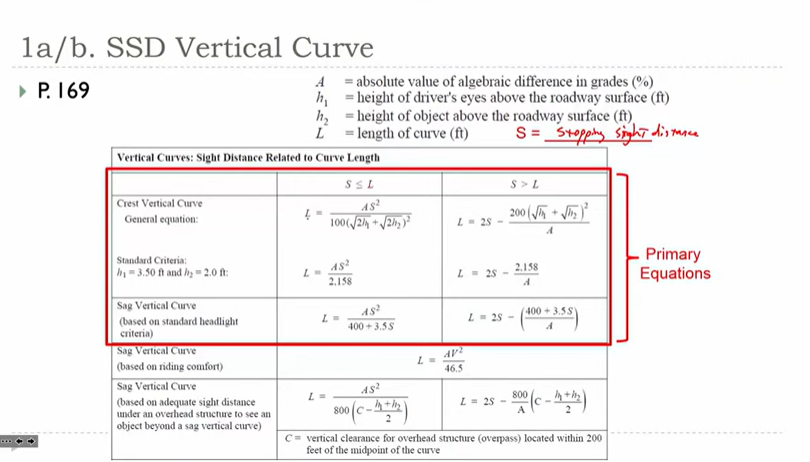

## Algorithm:

- First let's evaluate 2 inequalities: $$ S \le L   $$   $$ S \gt L $$
- Then we need to determine the required S (Stopping Sight Distance) from the table above or calculate the minimum curve length (L)
- We solve for both equations and the L in the equation with the true equality is the one used for the design vertical curve length

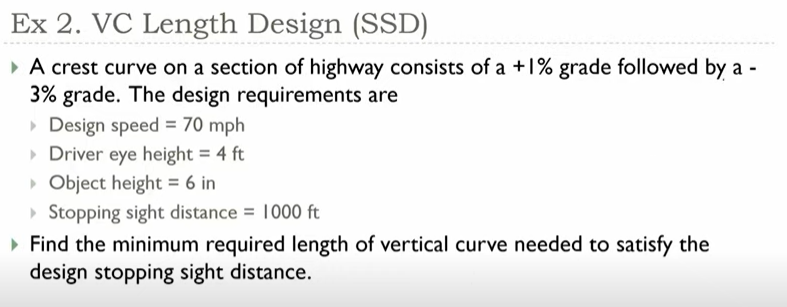

In [24]:
# From the given problem above, we need to determine the minimum required length of the vertical curve needed to satisfy the design stopping sight distance
g1 = 1 #% uphill grade
g2 = -3 #% downhill grade
V = 70 # mph design speed
h1 = 4 # ft driver eye height
h2 = 6 # in (BE CAREFUL! This dude is given in inches) object height
h2 /= 12 # we need to convert this into fts
ssd = 1000 # ft stopping sight distance

In [25]:
class Road:
    def __init__(self,g1,g2,V,h1,h2,ssd):
        self.g1 = g1 # assign g1
        self.g2 = g2 # assign g2
        self.v = V  # assign the design speed
        self.h1 = h1 # assign the driver eye height
        self.h2 = h2 # assign the object height
        self.ssd = ssd  # assign the stopping sight distance
        self.A = np.abs(g1-g2) # the absolute difference between the grades is in %
        self.L = 0.0 # curve length
    
    def calculate_curve(self):
        num1 = self.A*self.ssd**2
        den1 = 100*(np.sqrt(2*self.h1) + np.sqrt(2*self.h2))**2 
        L1 = num1/den1 

        num2 = 2*(np.sqrt(self.h1) + np.sqrt(self.h2))**2 
        den2 = self.A
        L2 = 2*self.ssd - (num2/den2) 
        
        print(f'S <= L: {L1} | S > L: {L2}')
        self.L = max(L1,L2)
        return self.L

In [26]:
louis_vertical_curve = Road(g1,g2,V,h1,h2,ssd)
louis_vertical_curve.calculate_curve()

S <= L: 2729.0985718429547 | S > L: 1996.335786437627


2729.0985718429547

# 1. Horizontal Curves

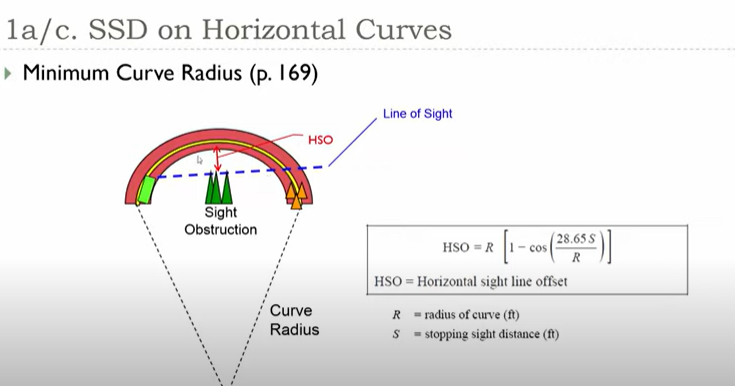

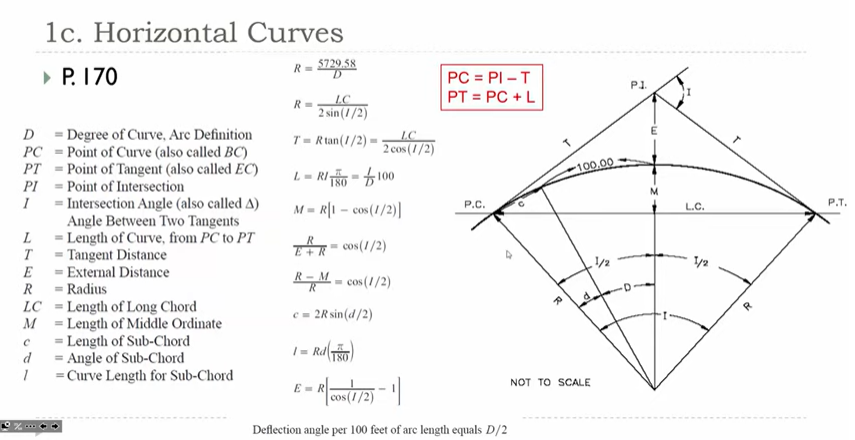

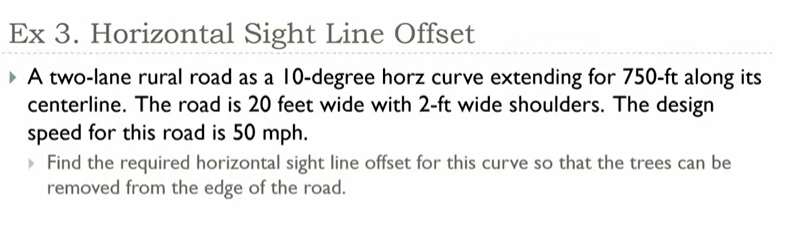

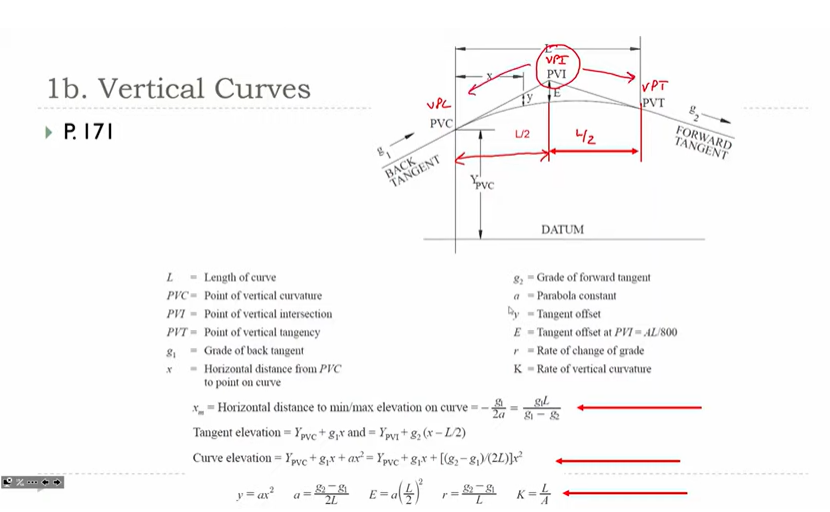
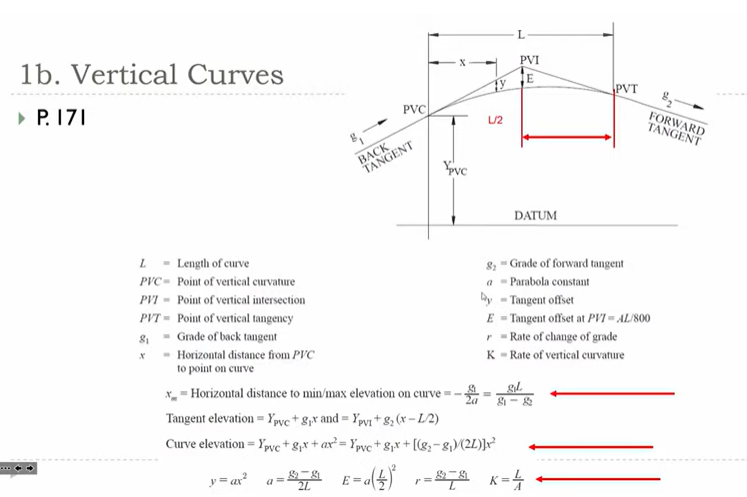

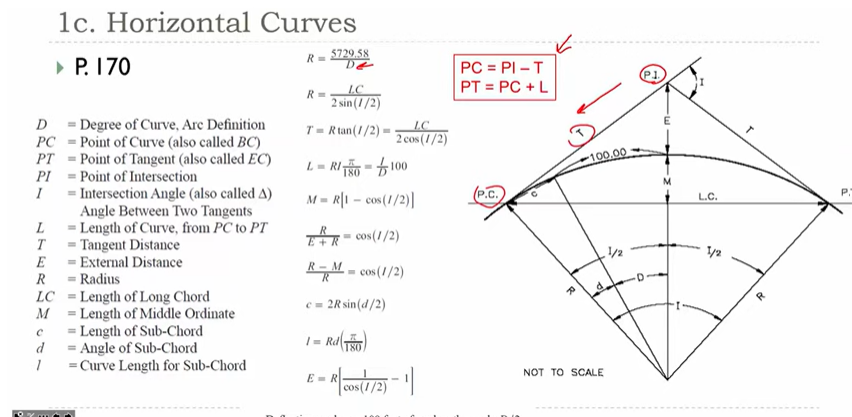

In [27]:
delta = 10 # degree hortz 
V = 50 #mph design speed 

# But we need to determine the radius R 
R = 5729.58/delta 
print(f'Radius: {R} ft')

Radius: 572.958 ft


In [28]:
# Calculate the stopping sight distance
t = 2.5 # seconds
a = 11.2 #ft^2/s
ssd = 1.47*V*t + (V**2 / (30*(a/32.2)))
print(f'Stopping sight distance: {ssd} ft')

Stopping sight distance: 423.33333333333337 ft


In [29]:
def convert_angle(theta):
    return np.deg2rad(theta) 

In [30]:
# Now we can get the horizontal sight distance 
theta = (28.65*ssd)/R # this theta is assumed to be in degrees
theta = convert_angle(theta) # so we need to convert this into radians
hsd = R*(1-np.cos(theta)) # then we call use the np.cos function
print(f'Horizontal Sight Distance: {hsd} ft')

Horizontal Sight Distance: 38.6607710817655 ft


In [31]:
offset = hsd - delta 
print(f'Line offset: {offset} ft')

Line offset: 28.660771081765503 ft


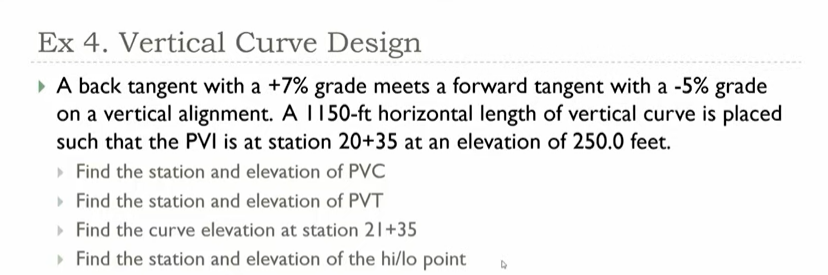

In [32]:
# Grade Information
g1 = 7 #% 
g2 = -5 #%


# Part 1: Station and Elevation of PVC
pvi_station = 2035 # stations
L = 1150 # length of the curve
pvc_station = pvi_station - L/2 
print(f' PVC Station: {pvc_station} stations') 

pvi_elevation = 250 # ft 
g1/=100
pvc_elevation = pvi_elevation - abs(g1)*(L/2)
print(f' PVC Elevation: {pvc_elevation} ft') 

 PVC Station: 1460.0 stations
 PVC Elevation: 209.75 ft


In [33]:
# Part 2: Station and Elevation of PVT
pvi_station = 2035 # stations
L = 1150 # length of the curve
pvt_station = pvi_station + L/2 
print(f' PVT Station: {pvt_station} stations') 

pvi_elevation = 250 # ft 
g2/=100
pvt_elevation = pvi_elevation - abs(g2)*(L/2)
print(f' PVT Elevation: {pvt_elevation} ft') 

 PVT Station: 2610.0 stations
 PVT Elevation: 221.25 ft


In [38]:
# Part 3: Curve elevation at station 21+35
x = 2135 - pvc_station # calculate the difference between 21+35 stations and pvc station
print(f'Change in x: {x}')
y = pvc_elevation + g1*x + ((g2-g1)/(2*L))*x**2 # Apply the parabolic equation
print(f'Elevation at 21+35 stations: {y} ft')

Change in x: 675.0
Elevation at 21+35 stations: 233.22826086956522 ft


In [41]:
# Part 4: Station and elevation at the hi/lo point
xhi = g1*L/(g1-g2)
print(f'Xhi: {xhi}')
y = pvc_elevation + g1*x + ((g2-g1)/(2*L))*xhi**2 # Apply the parabolic equation
print(f'Elevation at hi-lo point: {y} ft')

Xhi: 670.8333333333334
Elevation at hi-lo point: 233.52083333333331 ft
